In [1]:
URL = 'https://nnfs.io/datasets/fashion_mnist_images.zip'
FILE = 'fashion_mnist_images.zip'
FOLDER = 'fashion_mnist_images'

DOWNLOAD THE COMPRESS DATA

In [5]:
import os
import urllib
import urllib.request
import ssl


ssl._create_default_https_context = ssl._create_unverified_context

if not os.path.isfile(FILE):
    print(f'Downloading {URL} and saving as {FILE}...')
    urllib.request.urlretrieve(URL, FILE)


EXTRACT DATA

In [7]:
from zipfile import ZipFile

print('Unzipping images ..')
with ZipFile(FILE) as zip_images:
    zip_images.extractall(FOLDER)

print('DONE')

Unzipping images ..
DONE


DATA LOADING

In [11]:
import os

labels = os.listdir('fashion_mnist_images/train')
print(labels)

files = os.listdir('fashion_mnist_images/train/0')
print(files[:10])
print(len(files))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
['0000.png', '0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png']
6000


In [20]:
import cv2

image_data = cv2.imread('fashion_mnist_images/train/7/0002.png', cv2.IMREAD_UNCHANGED)
print(image_data)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0  49 135 182 150  59   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  78 255 220 21

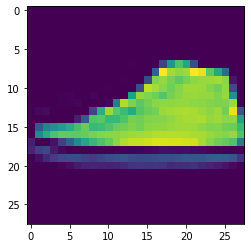

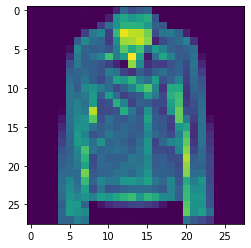

In [21]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(linewidth=200)

plt.imshow(image_data)
plt.show()

image_data = cv2.imread(
    'fashion_mnist_images/train/4/0011.png', cv2.IMREAD_UNCHANGED)
plt.imshow(image_data)
plt.show()


 
DATA ITERATION
iterate over all of the samples, load them, and put them into the input data (X) and
targets (y) lists

In [22]:
# Scan all the directories and create a list of labels
labels = os.listdir('fashion_mnist_images/train')
print(labels)

# Create lists for samples and labels
X = []
y = []

# For each label folder
for label in labels:
    # And for each image in given folder
    for file in os.listdir(os.path.join('fashion_mnist_images', 'train', label)):
        # Read the image
        image = cv2.imread(os.path.join('fashion_mnist_images/train', label, file), cv2.IMREAD_UNCHANGED)
        
        # And append it and a label to the lists
        X.append(image)
        y.append(label)


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


FUNCTIONS

In [23]:
import numpy as np
import cv2
import os


 Loads a MNIST dataset

In [25]:
def load_mnist_dataset(dataset, path):

    # Scan all the directories and create a list of labels
    labels = os.listdir(os.path.join(path, dataset))
    # Create lists for samples and labels
    X = []
    y = []
    # For each label folder
    for label in labels:
    # And for each image in given folder
        for file in os.listdir(os.path.join(path, dataset, label)):
            # Read the image
            image = cv2.imread(os.path.join(path, dataset, label, file), cv2.IMREAD_UNCHANGED)
            # And append it and a label to the lists
            X.append(image)
            y.append(label)
    # Convert the data to proper numpy arrays and return
    return np.array(X), np.array(y).astype('uint8')


MNIST dataset (train + test)

In [26]:
def create_data_mnist(path):
    # Load both sets separately
    X, y = load_mnist_dataset('train', path)
    X_test, y_test = load_mnist_dataset('test', path)
    # And return all the data
    return X, y, X_test, y_test


 Create dataset

In [27]:
X, y, X_test, y_test = create_data_mnist('fashion_mnist_images')

DATA PREPROCESSING range [-1,1]

In [30]:
# Scale features
X = (X.astype(np.float32) - 127.5) / 127.5
X_test = (X_test.astype(np.float32) - 127.5) / 127.5

print(X.min(), X.max())
print(X.shape)



-1.0079046 -1.0077816
(60000, 28, 28)


RESHAPE IMAGES FROM 2D 28X28 TO 1D 1X784

In [33]:
example = np.array([[1,2],[3,4]])
flattened = example.reshape(-1)

print(example)
print(example.shape)

print(flattened)
print(flattened.shape)

[[1 2]
 [3 4]]
(2, 2)
[1 2 3 4]
(4,)


In [34]:
# Reshape to vectors
X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


DATA SHUFFLING

In [36]:
print(y[0:10])
print(y[6000:6010])

[0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1]


In [37]:
keys = np.array(range(X.shape[0]))
print(keys[:10])

[0 1 2 3 4 5 6 7 8 9]


In [38]:
import nnfs
nnfs.init()
np.random.shuffle(keys)
print(keys[:10])

[ 3048 19563 58303  8870 40228 31488 21860 56864   845 25770]


[8 2 5 5 8 5 3 6 0 5 3 8 2 1 3]


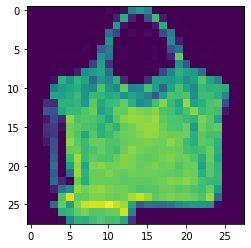

8


In [52]:
X = X[keys]
y = y[keys]

print(y[:15])

import matplotlib.pyplot as plt
plt.imshow((X[4].reshape(28, 28))) # Reshape as image is a vector already
plt.show()

print(y[4])



In [56]:
BATCH_SIZE = 8
steps = X.shape[0] // BATCH_SIZE # the integer division operator, //

if steps * BATCH_SIZE < X.shape[0]:
    steps += 1


In [57]:
batch_size = 2
X = [1, 2, 3, 4]
print(len(X) // batch_size)

2


In [58]:
X = [1, 2, 3, 4, 5]
print(len(X) // batch_size)

2


In [63]:
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()
# Create dataset
X, y = spiral_data(samples=100, classes=3)
EPOCHS = 15
BATCH_SIZE = 128 # We take 128 samples at once
# Calculate number of steps
steps = X.shape[0] // BATCH_SIZE
print('Steps: {}, XShape: {}, BatchSize: {}'.format(steps, X.shape[0],  BATCH_SIZE))
# Dividing rounds down. If there are some remaining data,
# but not a full batch, this won't include it.
# Add 1 to include the remaining samples in 1 more step.
if steps * BATCH_SIZE < X.shape[0]:
    steps += 1

for epoch in range(EPOCHS):
    for step in range(steps):
        print('Epoch: {}, Step: {}'.format(epoch, step))
        batch_X = X[step*BATCH_SIZE:(step+1)*BATCH_SIZE]
        batch_y = y[step*BATCH_SIZE:(step+1)*BATCH_SIZE]
        # Now we perform forward pass, loss calculation,
        # backward pass and update parameters



Steps: 2, XShape: 300, BatchSize: 128
Epoch: 0, Step: 0
Epoch: 0, Step: 1
Epoch: 0, Step: 2
Epoch: 1, Step: 0
Epoch: 1, Step: 1
Epoch: 1, Step: 2
Epoch: 2, Step: 0
Epoch: 2, Step: 1
Epoch: 2, Step: 2
Epoch: 3, Step: 0
Epoch: 3, Step: 1
Epoch: 3, Step: 2
Epoch: 4, Step: 0
Epoch: 4, Step: 1
Epoch: 4, Step: 2
Epoch: 5, Step: 0
Epoch: 5, Step: 1
Epoch: 5, Step: 2
Epoch: 6, Step: 0
Epoch: 6, Step: 1
Epoch: 6, Step: 2
Epoch: 7, Step: 0
Epoch: 7, Step: 1
Epoch: 7, Step: 2
Epoch: 8, Step: 0
Epoch: 8, Step: 1
Epoch: 8, Step: 2
Epoch: 9, Step: 0
Epoch: 9, Step: 1
Epoch: 9, Step: 2
Epoch: 10, Step: 0
Epoch: 10, Step: 1
Epoch: 10, Step: 2
Epoch: 11, Step: 0
Epoch: 11, Step: 1
Epoch: 11, Step: 2
Epoch: 12, Step: 0
Epoch: 12, Step: 1
Epoch: 12, Step: 2
Epoch: 13, Step: 0
Epoch: 13, Step: 1
Epoch: 13, Step: 2
Epoch: 14, Step: 0
Epoch: 14, Step: 1
Epoch: 14, Step: 2
